## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  17.483491   159.487467  0.007470   4.045028    17.621683
1  24.506236   289.877735  0.530867  10.491069   155.764929
2  17.615861  1648.343004  0.903282   7.507029  1489.097057
3  29.410212   689.928584  0.615393  10.454707   425.586940
4  60.536644  1206.285689  0.838439   8.608371  1013.228496


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0037596	total: 68.5ms	remaining: 1m 8s
1:	learn: 0.9913690	total: 69.1ms	remaining: 34.5s
2:	learn: 0.9799468	total: 69.7ms	remaining: 23.1s
3:	learn: 0.9681728	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9560701	total: 71ms	remaining: 14.1s
5:	learn: 0.9454510	total: 71.5ms	remaining: 11.8s
6:	learn: 0.9321232	total: 72ms	remaining: 10.2s
7:	learn: 0.9201790	total: 72.5ms	remaining: 8.99s
8:	learn: 0.9078757	total: 72.9ms	remaining: 8.02s
9:	learn: 0.8941145	total: 73.5ms	remaining: 7.27s
10:	learn: 0.8859798	total: 73.9ms	remaining: 6.64s
11:	learn: 0.8721768	total: 74.4ms	remaining: 6.13s
12:	learn: 0.8600320	total: 74.8ms	remaining: 5.68s
13:	learn: 0.8486374	total: 75.3ms	remaining: 5.3s
14:	learn: 0.8370779	total: 75.7ms	remaining: 4.97s
15:	learn: 0.8262930	total: 76ms	remaining: 4.68s
16:	learn: 0.8136082	total: 76.4ms	remaining: 4.42s
17:	learn: 0.8059392	total: 76.9ms	remaining: 4.2s
18:	learn: 0.7985362	total: 77.3ms	remaining: 3.99s


91:	learn: 0.3401233	total: 108ms	remaining: 1.07s
92:	learn: 0.3367979	total: 109ms	remaining: 1.06s
93:	learn: 0.3333423	total: 109ms	remaining: 1.05s
94:	learn: 0.3297755	total: 110ms	remaining: 1.04s
95:	learn: 0.3266700	total: 110ms	remaining: 1.04s
96:	learn: 0.3233119	total: 110ms	remaining: 1.03s
97:	learn: 0.3204261	total: 111ms	remaining: 1.02s
98:	learn: 0.3178872	total: 111ms	remaining: 1.01s
99:	learn: 0.3138422	total: 111ms	remaining: 1s
100:	learn: 0.3101567	total: 112ms	remaining: 995ms
101:	learn: 0.3065472	total: 112ms	remaining: 987ms
102:	learn: 0.3039312	total: 112ms	remaining: 979ms
103:	learn: 0.3007628	total: 113ms	remaining: 972ms
104:	learn: 0.2979756	total: 113ms	remaining: 966ms
105:	learn: 0.2940654	total: 114ms	remaining: 959ms
106:	learn: 0.2910643	total: 114ms	remaining: 953ms
107:	learn: 0.2881176	total: 115ms	remaining: 946ms
108:	learn: 0.2847146	total: 115ms	remaining: 938ms
109:	learn: 0.2820040	total: 115ms	remaining: 931ms
110:	learn: 0.2787719	to

277:	learn: 0.0754461	total: 185ms	remaining: 481ms
278:	learn: 0.0749416	total: 186ms	remaining: 480ms
279:	learn: 0.0745645	total: 186ms	remaining: 479ms
280:	learn: 0.0740734	total: 187ms	remaining: 478ms
281:	learn: 0.0737424	total: 187ms	remaining: 476ms
282:	learn: 0.0734121	total: 188ms	remaining: 475ms
283:	learn: 0.0731247	total: 188ms	remaining: 474ms
284:	learn: 0.0728543	total: 188ms	remaining: 472ms
285:	learn: 0.0725562	total: 189ms	remaining: 471ms
286:	learn: 0.0722991	total: 189ms	remaining: 470ms
287:	learn: 0.0720543	total: 190ms	remaining: 469ms
288:	learn: 0.0716311	total: 190ms	remaining: 468ms
289:	learn: 0.0714005	total: 191ms	remaining: 467ms
290:	learn: 0.0709692	total: 191ms	remaining: 466ms
291:	learn: 0.0704943	total: 192ms	remaining: 465ms
292:	learn: 0.0701885	total: 192ms	remaining: 464ms
293:	learn: 0.0699400	total: 193ms	remaining: 463ms
294:	learn: 0.0696934	total: 193ms	remaining: 462ms
295:	learn: 0.0693638	total: 194ms	remaining: 461ms
296:	learn: 

516:	learn: 0.0278008	total: 290ms	remaining: 271ms
517:	learn: 0.0276380	total: 290ms	remaining: 270ms
518:	learn: 0.0274408	total: 291ms	remaining: 269ms
519:	learn: 0.0272820	total: 291ms	remaining: 269ms
520:	learn: 0.0271249	total: 291ms	remaining: 268ms
521:	learn: 0.0270253	total: 292ms	remaining: 267ms
522:	learn: 0.0269348	total: 292ms	remaining: 266ms
523:	learn: 0.0268389	total: 292ms	remaining: 266ms
524:	learn: 0.0266888	total: 293ms	remaining: 265ms
525:	learn: 0.0266017	total: 293ms	remaining: 264ms
526:	learn: 0.0265283	total: 293ms	remaining: 263ms
527:	learn: 0.0264963	total: 294ms	remaining: 263ms
528:	learn: 0.0263430	total: 294ms	remaining: 262ms
529:	learn: 0.0261829	total: 295ms	remaining: 261ms
530:	learn: 0.0260921	total: 295ms	remaining: 261ms
531:	learn: 0.0260610	total: 296ms	remaining: 260ms
532:	learn: 0.0259110	total: 296ms	remaining: 259ms
533:	learn: 0.0257634	total: 296ms	remaining: 259ms
534:	learn: 0.0256274	total: 297ms	remaining: 258ms
535:	learn: 

692:	learn: 0.0128496	total: 368ms	remaining: 163ms
693:	learn: 0.0128095	total: 368ms	remaining: 162ms
694:	learn: 0.0127662	total: 369ms	remaining: 162ms
695:	learn: 0.0127267	total: 369ms	remaining: 161ms
696:	learn: 0.0126764	total: 370ms	remaining: 161ms
697:	learn: 0.0126252	total: 370ms	remaining: 160ms
698:	learn: 0.0125831	total: 371ms	remaining: 160ms
699:	learn: 0.0125419	total: 371ms	remaining: 159ms
700:	learn: 0.0125057	total: 371ms	remaining: 158ms
701:	learn: 0.0124703	total: 372ms	remaining: 158ms
702:	learn: 0.0124143	total: 372ms	remaining: 157ms
703:	learn: 0.0123362	total: 373ms	remaining: 157ms
704:	learn: 0.0122975	total: 373ms	remaining: 156ms
705:	learn: 0.0122593	total: 373ms	remaining: 156ms
706:	learn: 0.0122171	total: 374ms	remaining: 155ms
707:	learn: 0.0121893	total: 374ms	remaining: 154ms
708:	learn: 0.0121488	total: 375ms	remaining: 154ms
709:	learn: 0.0121077	total: 375ms	remaining: 153ms
710:	learn: 0.0120705	total: 376ms	remaining: 153ms
711:	learn: 

931:	learn: 0.0063899	total: 472ms	remaining: 34.4ms
932:	learn: 0.0063744	total: 472ms	remaining: 33.9ms
933:	learn: 0.0063667	total: 473ms	remaining: 33.4ms
934:	learn: 0.0063536	total: 473ms	remaining: 32.9ms
935:	learn: 0.0063484	total: 473ms	remaining: 32.4ms
936:	learn: 0.0063306	total: 474ms	remaining: 31.9ms
937:	learn: 0.0063268	total: 474ms	remaining: 31.3ms
938:	learn: 0.0063034	total: 475ms	remaining: 30.8ms
939:	learn: 0.0062931	total: 475ms	remaining: 30.3ms
940:	learn: 0.0062851	total: 475ms	remaining: 29.8ms
941:	learn: 0.0062491	total: 476ms	remaining: 29.3ms
942:	learn: 0.0062448	total: 476ms	remaining: 28.8ms
943:	learn: 0.0062318	total: 477ms	remaining: 28.3ms
944:	learn: 0.0062240	total: 477ms	remaining: 27.8ms
945:	learn: 0.0062011	total: 477ms	remaining: 27.3ms
946:	learn: 0.0061890	total: 478ms	remaining: 26.7ms
947:	learn: 0.0061808	total: 478ms	remaining: 26.2ms
948:	learn: 0.0061677	total: 479ms	remaining: 25.7ms
949:	learn: 0.0061454	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

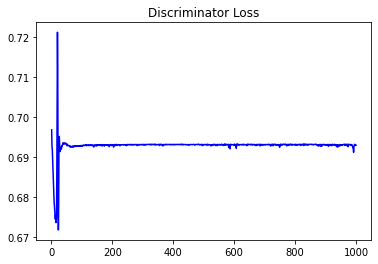

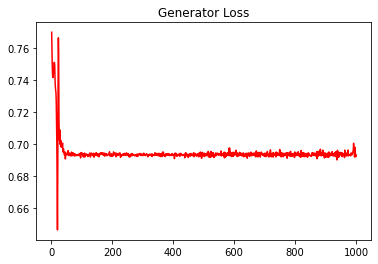

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.010126276954418534


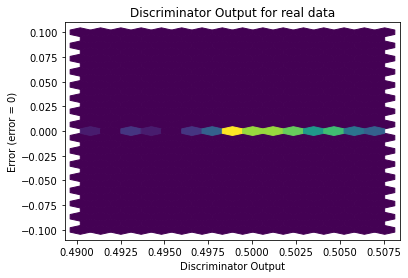

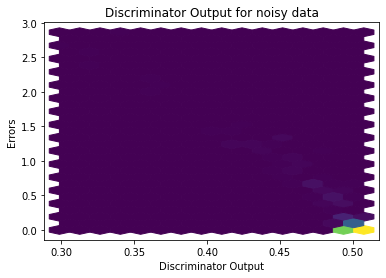

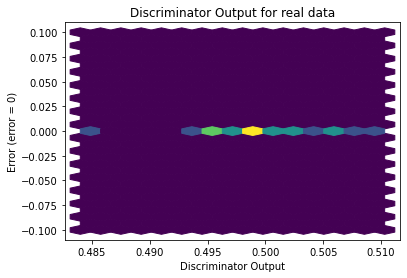

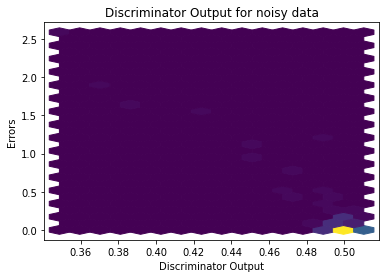

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


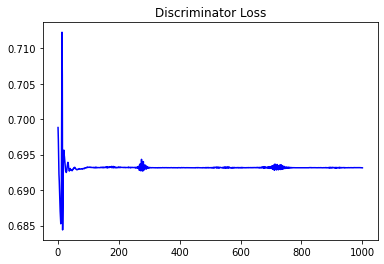

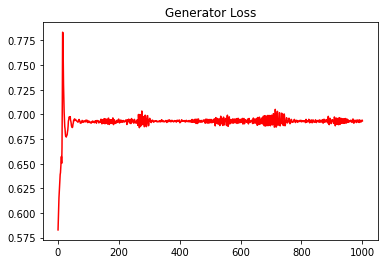

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.027513309819228175


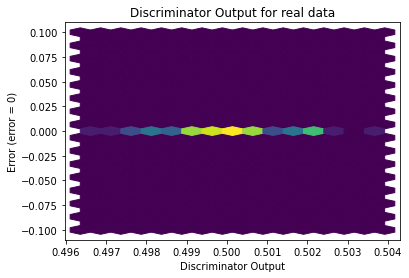

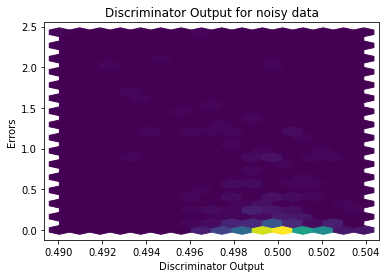

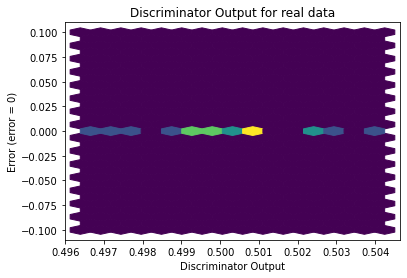

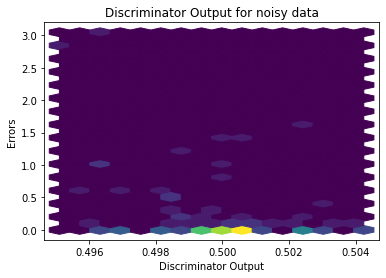

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4950]], requires_grad=True)
